In [54]:
import pandas as pd

from notebooks.analytics.utils import init_analysis



In [55]:

fs = init_analysis("daeclust_07_01-clusters")

In [56]:
start_time = fs["start_time"].min()

In [57]:
start_time

1674145821886

In [76]:
fs.groupby(["round_id", "trainer_id"])["trainer_id"].count().groupby("round_id").median().mean()

4.828431372549019

In [58]:
fs_rounds_time_start = fs.groupby("round_id")["start_time"].min()

In [59]:
fs_round_minutes = (fs_rounds_time_start - start_time) / (1000 * 60)

In [60]:
EXP_NAME = "daeclust_07_01-clusters-selection"
fs_test = init_analysis("daeclust_07_01-clusters-selection")
fs_means = fs_test.groupby(["round_id", "trainer_id"])["test_acc"].max().groupby(["round_id"]).mean().reset_index()

In [63]:
fs_acc_time = fs_means.merge(fs_round_minutes.reset_index(), on=["round_id"])

In [64]:
fed = init_analysis("fed_avg_02")

start_time = fed["start_time"].min()
fed_rounds_time_start = fed.groupby("round_id")["start_time"].min()
fed_round_minutes = (fed_rounds_time_start - start_time) / (1000 * 60)

fed_means = fed.groupby(["round_id"])["test_acc"].mean().reset_index()
fed_acc_time = fed_means.merge(fed_round_minutes.reset_index(), on=["round_id"])

In [77]:
import pandas as pd

fed_acc_time["label"] = "FedAVG"
fs_acc_time["label"] = "FedSwarm"
df = pd.concat([fed_acc_time, fs_acc_time.loc[fs_acc_time.round_id < 50]], ignore_index=True)
df

,round_id,test_acc,start_time,label
0,0.0,NaN,0.000000,FedAVG
1,1.0,0.234642,0.033400,FedAVG
2,2.0,0.195363,0.605467,FedAVG
3,3.0,0.163833,0.705983,FedAVG
4,4.0,0.268238,0.846217,FedAVG
...,...,...,...,...
147,45.0,0.991600,36.019917,FedSwarm
148,46.0,0.996488,36.542417,FedSwarm
149,47.0,0.994613,37.379600,FedSwarm
150,48.0,0.994663,38.376900,FedSwarm


<AxesSubplot: xlabel='start_time', ylabel='test_acc'>

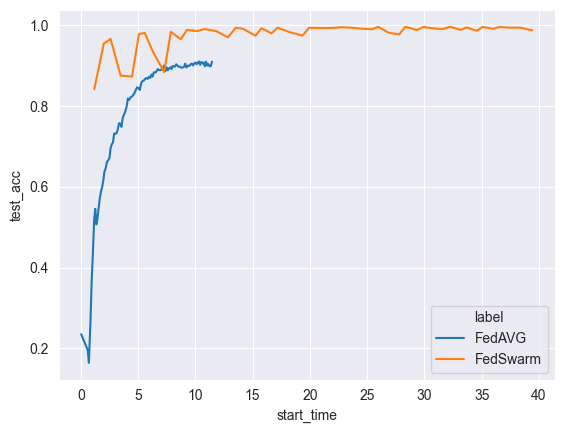

In [78]:
import seaborn as sns

sns.lineplot(df, x="start_time", y="test_acc", hue="label")